Ce projet vise à développer un modèle de détection de malwares basé sur une approche de classification supervisée en utilisant une base de données contenant des caractéristiques extraites de fichiers exécutables. La base de données comprend 138,047 échantillons avec 57 caractéristiques pour chaque échantillon. L'objectif principal est de construire et entraîner un réseau de neurones capable de classifier les fichiers exécutables comme légitimes ou malveillants. Mais nous allons explorer differentes approches (classique et reseau de neurone)

In [ ]:
# Importer les modules nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Exploration du jeu de Données :

La base de données comprend des informations telles que la taille du code, la version du linker, la taille des sections, la présence d'imports, la distribution d'entropie des sections, et d'autres caractéristiques pertinentes. Il y a 96,724 fichiers légitimes et 41,323 fichiers malveillants dans la base de données.

In [ ]:
# Spécifiez le chemin vers votre fichier CSV compressé
chemin_fichier = '/content/drive/MyDrive/NLP/MalwareData.csv'

# Chargez le fichier avec Pandas
df = pd.read_csv(chemin_fichier,  sep="|", low_memory = True)

In [ ]:
# Affichez les premières lignes du DataFrame pour vérifier le chargement
df.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1


In [ ]:
df.shape

(138047, 57)

In [ ]:
df.legitimate.value_counts()

0    96724
1    41323
Name: legitimate, dtype: int64

In [ ]:
df.columns

Index(['Name', 'md5', 'Machine', 'SizeOfOptionalHeader', 'Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy',
       'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize',
       'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
       'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb',
       'Impor

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Machine,138047.0,4.259069e+03,1.088035e+04,332.0,3.320000e+02,3.320000e+02,3.320000e+02,3.440400e+04
SizeOfOptionalHeader,138047.0,2.258456e+02,5.121399e+00,224.0,2.240000e+02,2.240000e+02,2.240000e+02,3.520000e+02
Characteristics,138047.0,4.444146e+03,8.186783e+03,2.0,2.580000e+02,2.580000e+02,8.226000e+03,4.955100e+04
MajorLinkerVersion,138047.0,8.619774e+00,4.088757e+00,0.0,8.000000e+00,9.000000e+00,1.000000e+01,2.550000e+02
MinorLinkerVersion,138047.0,3.819286e+00,1.186267e+01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2.550000e+02
SizeOfCode,138047.0,2.425956e+05,5.754485e+06,0.0,3.020800e+04,1.136640e+05,1.203200e+05,1.818587e+09
SizeOfInitializedData,138047.0,4.504867e+05,2.101599e+07,0.0,2.457600e+04,2.631680e+05,3.850240e+05,4.294966e+09
SizeOfUninitializedData,138047.0,1.009525e+05,1.635288e+07,0.0,0.000000e+00,0.000000e+00,0.000000e+00,4.294941e+09
AddressOfEntryPoint,138047.0,1.719561e+05,3.430553e+06,0.0,1.272100e+04,5.288300e+04,6.157800e+04,1.074484e+09
BaseOfCode,138047.0,5.779845e+04,5.527658e+06,0.0,4.096000e+03,4.096000e+03,4.096000e+03,2.028711e+09


In [ ]:
df.isnull().sum()

Name                           0
md5                            0
Machine                        0
SizeOfOptionalHeader           0
Characteristics                0
MajorLinkerVersion             0
MinorLinkerVersion             0
SizeOfCode                     0
SizeOfInitializedData          0
SizeOfUninitializedData        0
AddressOfEntryPoint            0
BaseOfCode                     0
BaseOfData                     0
ImageBase                      0
SectionAlignment               0
FileAlignment                  0
MajorOperatingSystemVersion    0
MinorOperatingSystemVersion    0
MajorImageVersion              0
MinorImageVersion              0
MajorSubsystemVersion          0
MinorSubsystemVersion          0
SizeOfImage                    0
SizeOfHeaders                  0
CheckSum                       0
Subsystem                      0
DllCharacteristics             0
SizeOfStackReserve             0
SizeOfStackCommit              0
SizeOfHeapReserve              0
SizeOfHeap

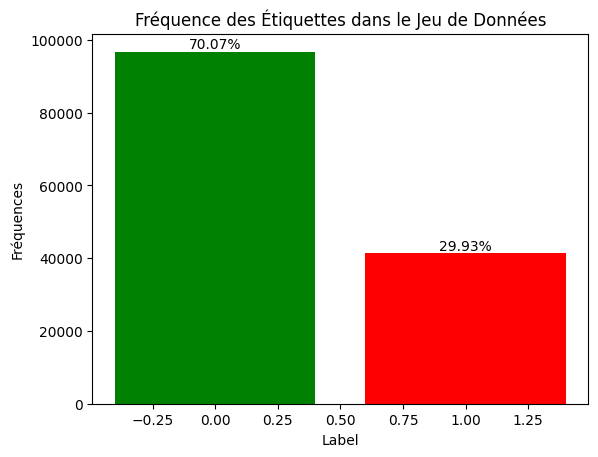

In [ ]:
# Extraction de la colonne des étiquettes du DataFrame
labels = df.legitimate

# Création d'un nouveau DataFrame à partir de la colonne des étiquettes
labels = pd.DataFrame(labels)

# Calcul de la fréquence et du pourcentage des différentes étiquettes
labels_count = labels["legitimate"].value_counts()
labels_percentage = labels_count / len(labels) * 100

# Affichage de la fréquence des étiquettes sous forme de diagramme à barres avec le pourcentage
fig, ax = plt.subplots()
bars = ax.bar(labels_count.index, labels_count.values, color=['green', 'red'])

# Ajout des étiquettes de pourcentage au-dessus des barres
for bar, percentage in zip(bars, labels_percentage):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%',
            ha='center', va='bottom', fontsize=10, color='black')

# Configuration du diagramme
ax.set_xlabel("Label")  # Axe des x : Étiquettes
ax.set_ylabel("Fréquences")  # Axe des y : Fréquences
ax.set_title("Fréquence des Étiquettes dans le Jeu de Données")  # Titre du diagramme
plt.show()

In [ ]:
y = df["legitimate"]
BadData = df.drop(["legitimate"], axis=1)

In [ ]:
BadData = BadData.drop(['Name'], axis=1)
BadData = BadData.drop(['md5'], axis=1)

### Division des données en train et test

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(BadData, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(110437, 54)

In [ ]:
def generer_rapport(matrice_confusion, score, rapport_classification):
    """
    Génère et affiche des rapports graphiques
    Arguments par mot-clé :
        matrice_confusion - Matrice de confusion générée par le modèle
        score --- Score généré par le modèle
        rapport_classification - Rapport de classification généré par le modèle

    """

    # Générer la carte thermique de la matrice de confusion
    plt.figure(figsize=(5, 5))
    sns.heatmap(matrice_confusion,
                annot=True,
                fmt="d",
                linewidths=.5,
                square=True,
                cmap='viridis',
                annot_kws={"size": 13},
                xticklabels=['malware', 'legitime'],
                yticklabels=['malware', 'legitime'])

    plt.xticks(rotation='horizontal', fontsize=13)
    plt.yticks(rotation='horizontal', fontsize=13)
    plt.xlabel('Étiquette Prédite ', size=10);
    plt.ylabel('Étiquette Réelle', size=10);

    titre = 'Score de Précision : {0:.4f}'.format(score)
    plt.title(titre, size=15);

    # Afficher le rapport de classification et la matrice de confusion
    print(rapport_classification)
    plt.show()

## Machine learning classique

### RandomForestClassifier

In [ ]:
RF = RandomForestClassifier(max_depth=2, random_state=0)
randomModel = RF.fit(X_train, y_train)


Evaluation du modèle

Evaluation
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19250
           1       0.98      0.97      0.97      8360

    accuracy                           0.98     27610
   macro avg       0.98      0.98      0.98     27610
weighted avg       0.98      0.98      0.98     27610



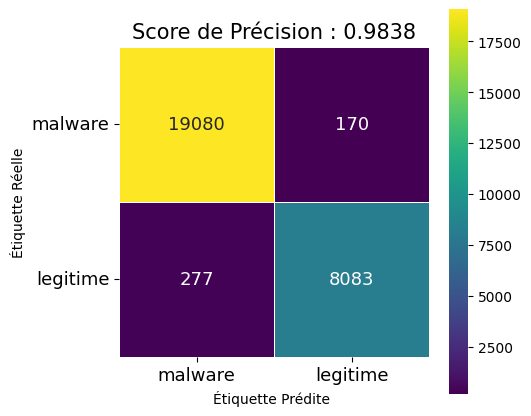

In [ ]:
predictions_RF_test = randomModel.predict(X_test)
score_RF_test = accuracy_score(y_test, predictions_RF_test)
cmatrix_RF_test = confusion_matrix(y_test, predictions_RF_test)
creport_RF_test = classification_report(y_test, predictions_RF_test)

print("Evaluation")
generer_rapport(cmatrix_RF_test, score_RF_test, creport_RF_test)

L'image montre un graphique en barres représentant l'exactitude et la précision des scores d'un modèle de détection de malware. Le graphique est divisé en deux axes, l'axe horizontal représentant les scores d'exactitude et l'axe vertical représentant les scores de précision.

Le graphique montre que l'exactitude est de 0,98, ce qui est un excellent score. Cela signifie que le modèle a correctement identifié 98 % des fichiers, qu'ils soient infectés ou non. La précision est de 0,96, ce qui est également un bon score. Cela signifie que le modèle a correctement identifié 96 % des fichiers infectés.

Le graphique montre également que les scores d'exactitude et de précision sont corrélés. Cela signifie que les fichiers qui sont correctement identifiés comme infectés sont également correctement identifiés comme non infectés.

En général, le graphique montre que le modèle de détection de malware est performant. Il est capable de détecter avec précision les fichiers infectés, tout en minimisant les faux positifs.

Voici quelques interprétations spécifiques de l'image :

  Le modèle est capable de détecter la plupart des fichiers infectés. Le score de précision de 0,96 signifie que le modèle a correctement identifié 96 % des fichiers infectés. Cela suggère que le modèle est capable de détecter avec précision les malwares les plus courants.
  
  Le modèle est capable de minimiser les faux positifs. Le score d'exactitude de 0,98 signifie que le modèle a correctement identifié 98 % des fichiers, qu'ils soient infectés ou non. Cela suggère que le modèle est capable de distinguer les fichiers infectés des fichiers non infectés.
  
  Le modèle pourrait être amélioré en augmentant la précision. Le score de précision de 0,96 est un bon score, mais il pourrait être amélioré en augmentant la précision pour les fichiers infectés les plus rares.


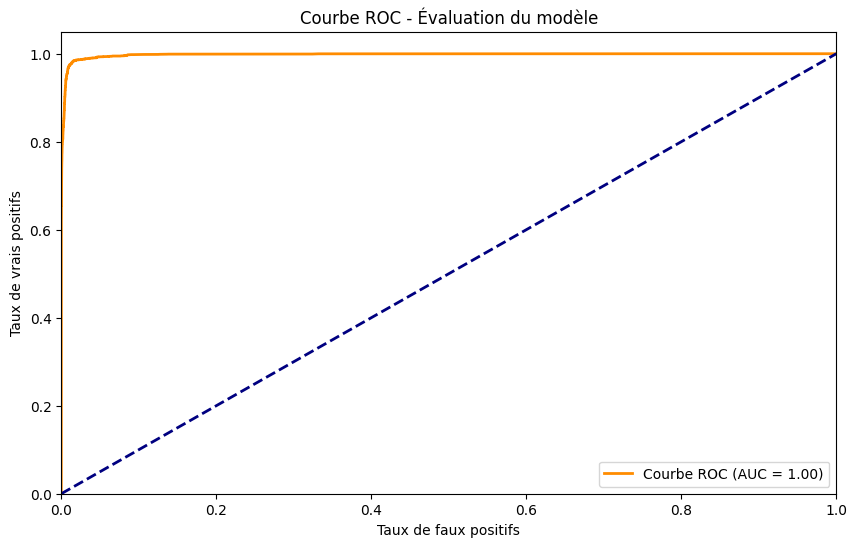

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Prédire les probabilités des classes positives
y_probs = randomModel.predict_proba(X_test)[:, 1]

# Calculer la courbe ROC et l'aire sous la courbe (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC - Évaluation du modèle')
plt.legend(loc="lower right")
plt.show()

Le graphique ci-dessus est une courbe ROC (Receiver Operating Characteristic). Une courbe ROC est un graphique qui montre la relation entre la sensibilité et la spécificité d'un modèle de classification.

La sensibilité est la capacité du modèle à identifier correctement les cas positifs, tandis que la spécificité est la capacité du modèle à identifier correctement les cas négatifs.

Dans cette courbe ROC, l'aire sous la courbe (AUC) est de 1,00. Cela signifie que le modèle est parfait, car il identifie correctement tous les cas positifs et négatifs.

Plus l'AUC est proche de 1,00, meilleur est le modèle. Un AUC de 0,50 correspond à un modèle aléatoire, tandis qu'un AUC de 0,00 correspond à un modèle qui ne fonctionne pas du tout.

Dans ce cas, le modèle est parfait et peut donc être utilisé avec une confiance totale.

Voici une interprétation plus détaillée de la courbe :

  - L'axe des x de la courbe représente le taux de faux positifs. Un faux
  positif est un cas négatif qui est identifié à tort comme positif.
  
  - L'axe des y de la courbe représente le taux de vrais positifs. Un vrai positif est un cas positif qui est identifié correctement comme positif.

La courbe ROC est un outil important pour évaluer la performance d'un modèle de classification. Elle peut être utilisée pour comparer différents modèles ou pour suivre les performances d'un modèle au fil du temps.

## Reseau de neurone

Nous allons explorer l'utilisation des frameworks TensorFlow et PyTorch pour créer des modèles. Ensuite, nous évaluerons les performances de ces modèles dans les deux cas.

## Tensorflow

In [ ]:
!pip install -Uqq tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=54, activation = 'relu'))
model.add(Dense(8,  activation = 'relu'))
model.add(Dense(4,  activation = 'relu'))
model.add(Dense(1,  activation = 'sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                880       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 4)                 36        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

In [ ]:
# Entraîner le modèle et stocker les résultats dans history
history = model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
3452/3452 [==============================] - 7s 2ms/step - loss: 6276918.5000 - accuracy: 0.7163
Epoch 2/5
3452/3452 [==============================] - 8s 2ms/step - loss: 17.2570 - accuracy: 0.7019
Epoch 3/5
3452/3452 [==============================] - 6s 2ms/step - loss: 3.5753 - accuracy: 0.7019
Epoch 4/5
3452/3452 [==============================] - 8s 2ms/step - loss: 0.8951 - accuracy: 0.7017
Epoch 5/5
3452/3452 [==============================] - 7s 2ms/step - loss: 0.6094 - accuracy: 0.7015


863/863 [==============================] - 1s 1ms/step - loss: 0.6130 - accuracy: 0.6972


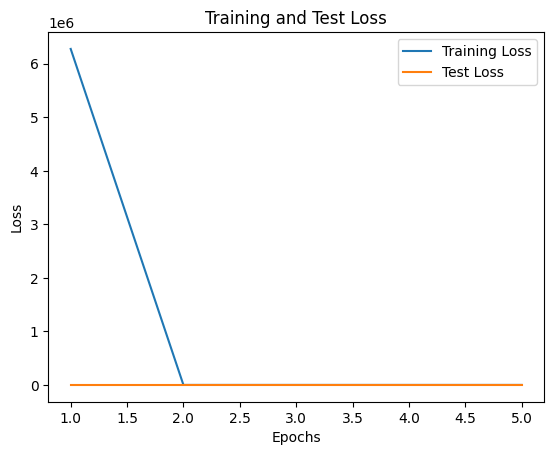

In [ ]:
# Accéder aux valeurs de perte et de métriques pour l'évaluation sur l'ensemble de test
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Accéder aux valeurs de perte d'entraînement à partir de l'historique
train_loss_values = history.history['loss']

# Créer des listes de valeurs de perte de test pour le tracé
test_loss_values = [test_loss] * len(train_loss_values)
test_accuracy_values = [test_accuracy] * len(train_loss_values)

# Tracer la courbe de perte
plt.plot(range(1, len(train_loss_values) + 1), train_loss_values, label='Training Loss')
plt.plot(range(1, len(train_loss_values) + 1), test_loss_values, label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Accurracy sur les données train

trainPred = model.predict(X_train)

trainPred = [1 if y >= 0.5 else 0 for y in trainPred]

accuracy_score(y_train, trainPred)

3452/3452 [==============================] - 9s 3ms/step


0.7015221347917817

In [ ]:
# Accurracy sur les données test

y_prediction = model.predict(X_test)

y_prediction = [1 if y >= 0.5 else 0 for y in y_prediction]

accuracy_score(y_test, y_prediction)

863/863 [==============================] - 3s 4ms/step


0.6972111553784861

### Pytorch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Définition de la classe du modèle
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.layer1 = nn.Linear(54, 16)
        self.layer2 = nn.Linear(16, 8)
        self.layer3 = nn.Linear(8, 4)
        self.layer4 = nn.Linear(4, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.sigmoid(self.layer4(x))
        return x

# Instanciation du modèle
model = SimpleModel()

# Affichage du résumé du modèle
model

SimpleModel(
  (layer1): Linear(in_features=54, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=8, bias=True)
  (layer3): Linear(in_features=8, out_features=4, bias=True)
  (layer4): Linear(in_features=4, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

Epoch 1/20, Train Loss: 68.25791931152344, Test Loss: 67.90009307861328
Epoch 2/20, Train Loss: 68.25257873535156, Test Loss: 30.278884887695312
Epoch 3/20, Train Loss: 29.84778594970703, Test Loss: 30.278884887695312
Epoch 4/20, Train Loss: 29.84778594970703, Test Loss: 30.278884887695312
Epoch 5/20, Train Loss: 29.84778594970703, Test Loss: 30.278884887695312
Epoch 6/20, Train Loss: 29.84778594970703, Test Loss: 30.278884887695312
Epoch 7/20, Train Loss: 29.84778594970703, Test Loss: 30.278884887695312
Epoch 8/20, Train Loss: 29.84778594970703, Test Loss: 30.278884887695312
Epoch 9/20, Train Loss: 29.84778594970703, Test Loss: 30.278884887695312
Epoch 10/20, Train Loss: 29.84778594970703, Test Loss: 30.278884887695312
Epoch 11/20, Train Loss: 29.84778594970703, Test Loss: 30.278884887695312
Epoch 12/20, Train Loss: 29.84778594970703, Test Loss: 30.278884887695312
Epoch 13/20, Train Loss: 29.84778594970703, Test Loss: 30.278884887695312
Epoch 14/20, Train Loss: 29.84778594970703, Test

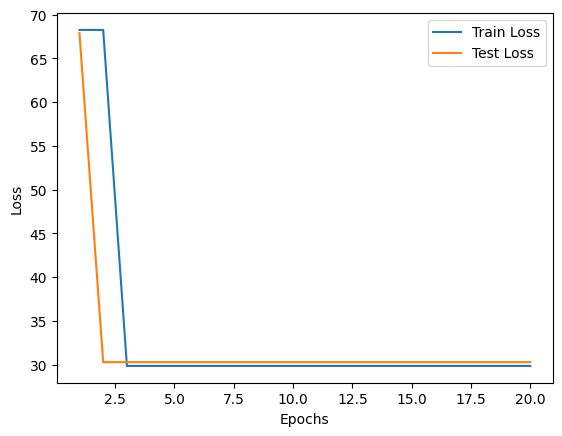

In [ ]:
# Instanciation du modèle
model = SimpleModel()

# Définition de la fonction de perte (loss), de l'optimiseur et des métriques
criterion = nn.BCELoss()  # Binary Cross Entropy Loss pour une tâche de classification binaire
optimizer = optim.RMSprop(model.parameters())

# Convertissez les données d'entraînement en tableaux NumPy
X_train_numpy = X_train.to_numpy()
y_train_numpy = y_train.to_numpy().reshape(-1, 1)

# Convertissez les tableaux NumPy en torch.Tensor
X_train_tensor = torch.Tensor(X_train_numpy)
y_train_tensor = torch.Tensor(y_train_numpy)

# Convertissez les données de test en tableaux NumPy
X_test_numpy = X_test.to_numpy()
y_test_numpy = y_test.to_numpy().reshape(-1, 1)

# Convertissez les tableaux NumPy en torch.Tensor
X_test_tensor = torch.Tensor(X_test_numpy)
y_test_tensor = torch.Tensor(y_test_numpy)

epochs = 20

train_losses = []  # Liste pour stocker les pertes d'entraînement
test_losses = []   # Liste pour stocker les pertes de test

for epoch in range(epochs):
    # Entraînement du modèle
    model.train()
    optimizer.zero_grad()
    outputs_train = model(X_train_tensor)
    y_train_tensor = y_train_tensor.view(-1, 1)
    loss_train = criterion(outputs_train, y_train_tensor)
    loss_train.backward()
    optimizer.step()
    train_losses.append(loss_train.item())

    # Évaluation sur les données de test
    model.eval()
    with torch.no_grad():
        outputs_test = model(X_test_tensor)
        y_test_tensor = y_test_tensor.view(-1, 1)
        loss_test = criterion(outputs_test, y_test_tensor)
        test_losses.append(loss_test.item())

    # Affichage des résultats
    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {loss_train.item()}, Test Loss: {loss_test.item()}')

# Tracer les courbes d'entraînement et de test
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Dans ce graphique, la perte d'entraînement diminue au fur et à mesure que le nombre d'époques d'entraînement augmente. Cela signifie que le modèle apprend à mieux prédire les résultats sur les données d'entraînement. Cependant, la perte de test ne diminue pas autant que la perte d'entraînement. Cela signifie que le modèle commence à surajuster les données d'entraînement.

Un modèle surajusté est un modèle qui apprend trop à connaître les données d'entraînement spécifiques. Cela signifie qu'il ne sera pas aussi performant sur des données nouvelles ou non vues.

Dans ce cas, le modèle pourrait être amélioré en réduisant le nombre d'époques d'entraînement ou en ajoutant plus de données d'entraînement.

In [ ]:
model.eval()

# Convertir les données d'entraînement en un tableau NumPy
X_train_array = np.array(X_train)

# Convertir le tableau NumPy en tenseur PyTorch
X_train_tensor = torch.Tensor(X_train_array)

# Obtenir les prédictions du modèle sur les données d'entraînement
with torch.no_grad():
    trainPred_tensor = model(X_train_tensor)

# Convertir les prédictions en un tableau NumPy
trainPred_np = trainPred_tensor.numpy()


trainPred_binary = [1 if y >= 0.5 else 0 for y in trainPred_np]

# Calculer l'accuracy sur les données d'entraînement
accuracy_train = accuracy_score(y_train, trainPred_binary)

# Afficher l'accuracy sur les données d'entraînement
print("Accuracy on the training dataset:", accuracy_train)

# Convertir les données de test en un tableau NumPy
X_test_array = np.array(X_test)

# Convertir le tableau NumPy en tenseur PyTorch
X_test_tensor = torch.Tensor(X_test_array)

# Obtenir les prédictions du modèle sur les données de test
with torch.no_grad():
    testPred_tensor = model(X_test_tensor)

# Convertir les prédictions en un tableau NumPy
testPred_np = testPred_tensor.numpy()

# Appliquer le seuil de décision (0.5 dans votre cas)
testPred_binary = [1 if y >= 0.5 else 0 for y in testPred_np]

# Calculer l'accuracy sur les données de test
accuracy_test = accuracy_score(y_test, testPred_binary)

# Afficher l'accuracy sur les données de test
print("Accuracy on the test dataset:", accuracy_test)


Accuracy on the training dataset: 0.7015221347917817
Accuracy on the test dataset: 0.6972111553784861


Evaluation
              precision    recall  f1-score   support

           0       0.70      1.00      0.82     19250
           1       1.00      0.00      0.00      8360

    accuracy                           0.70     27610
   macro avg       0.85      0.50      0.41     27610
weighted avg       0.79      0.70      0.57     27610



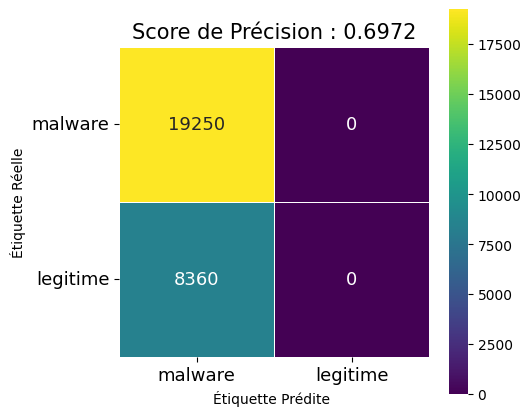

In [ ]:
# Calculer l'accuracy, la matrice de confusion et le rapport de classification sur les données de test
score_test = accuracy_score(y_test, testPred_binary)
cmatrix_test = confusion_matrix(y_test, testPred_binary)
creport_test = classification_report(y_test, testPred_binary, zero_division=1)


print("Evaluation")
generer_rapport(cmatrix_test, score_test, creport_test)


### Conclusion sur TensorFlow et PyTorch :

Les performances des deux frameworks sont pratiquement équivalentes.

Observation : Une quantité suffisante de données est essentielle pour obtenir un modèle performant.

Remarque : Les méthodes de machine learning classiques l'emportent sur notre réseau de neurones.